In [6]:
import numpy as np

In [7]:
import matplotlib.pyplot as plt

In [23]:
train_data = np.genfromtxt('lab_1_train.csv', delimiter=',', skip_header=1)
test_data = np.genfromtxt('lab_1_test.csv', delimiter=',', skip_header=1)

In [47]:
x_train, y_train = train_data[:, 1], train_data[:, 2]
x_test, y_test = test_data[:, 1], test_data[:, 2]

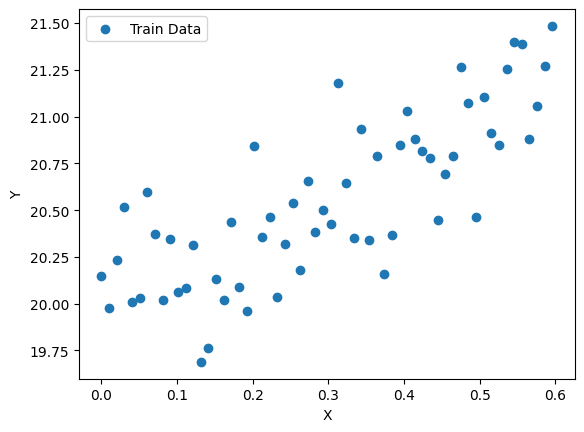

In [48]:
plt.scatter(x_train, y_train, label='Train Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [62]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [68]:
def linear_func(const, koef, x):
    return const + koef * x

In [78]:
def gradient_descent(x, y, learning_rate, eps):
    n = len(x)
    w = 0
    b = 0
    loss = 1e9
    prev_loss = float('inf')
    epoch = 0
    while (prev_loss - loss) > eps:
        y_pred = linear_func(const=b, koef=w, x=x)
        dw = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
        prev_loss = loss
        loss = mse_loss(y, y_pred)
        epoch += 1
        print(f'Epoch {epoch}: w={w}, b={b}, loss={loss}')
    return w, b

In [79]:
learning_rate = 0.01
eps = 0.000001
w, b = gradient_descent(x_train, y_train, learning_rate, eps)

Epoch 1: w=0.12367813465364869, b=0.41099126382076906, loss=422.47740188480714
Epoch 2: w=0.24461160240278607, b=0.8130256306535505, loss=404.25742497676725
Epoch 3: w=0.3628603365917162, b=1.2062985955438985, loss=386.82412434421605
Epoch 4: w=0.4784829623813285, b=1.59100138645794, loss=370.1435331252907
Epoch 5: w=0.5915368253029152, b=1.967321057420207, loss=354.18315106962933
Epoch 6: w=0.7020780191887422, b=2.3354405796185445, loss=338.911881213436
Epoch 7: w=0.8101614134929777, b=2.6955389305204642, loss=324.29996928877193
Epoch 8: w=0.9158406800162845, b=3.0477911810443508, loss=310.3189457490135
Epoch 9: w=1.019168319047094, b=3.392368580827974, loss=296.9415702975205
Epoch 10: w=1.120195684932291, b=3.7294386416358423, loss=284.1417788114293
Epoch 11: w=1.2189730110897676, b=4.059165218946015, loss=271.89463255715407
Epoch 12: w=1.3155494344750247, b=4.381708591756117, loss=260.17626959864884
Epoch 13: w=1.409973019513739, b=4.697225540647417, loss=248.96385830374837
Epoch 14

In [80]:
y_pred_test = linear_func(koef=w, x=x_test, const=b)
test_loss = mse_loss(y_test, y_pred_test)
print(f'Test loss: {test_loss}')

Test loss: 0.07537979511491412


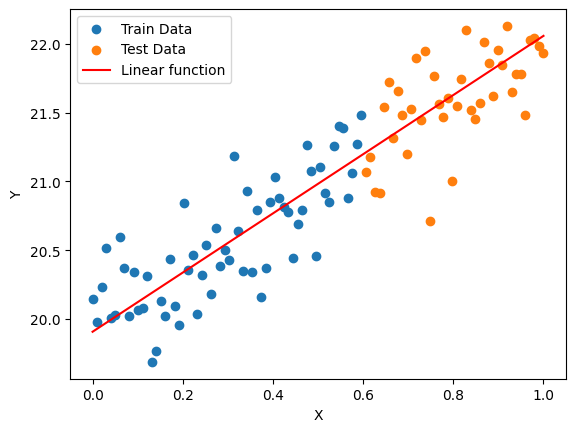

In [81]:
plt.scatter(x_train, y_train, label='Train Data')
plt.scatter(x_test, y_test, label='Test Data')
plt.plot([0, 1], [linear_func(koef=w, x=0, const=b), linear_func(koef=w, x=1, const=b)], label = 'Linear function', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()